## **Pneumonia Detection from Chest X - Ray Images using Convolutional Neural Networks**

<h1>1. Business Problem</h1>

<h2>1.1. Description of the problem</h2>

<p> Pneumonia is a lung infection. It  is a form of acute respiratory infection that is most commonly caused by viruses or bacteria. It can cause mild to life-threatening illness in people of all ages. Pneumonia can be prevented by immunization, adequate nutrition, and by addressing environmental factors.<p>

<p> It is the single largest infectious cause of death in children worldwide. Pneumonia killed more than 808,000 children under 5 years  of age in 2017, accounting for 15% of all deaths of children under 5 years of age.  People at-risk for pneumonia also include adults over the age of 65 and people with pre existing health problems. Pneumonia is the most common cause of sepsis and septic shock, causing 50% of all episodes.<p>

<p> Pneumonia is caused by several infectious agents, including viruses, bacteria and fungi. Pneumonia can develop in patients who are already in the hospital. Hospital-acquired pneumonia has a higher mortality rate than any other hospital-acquired infection.<p>

<p> Early diagnosis of pneumonia is crucial to ensure curative treatment and increase the survival rates of patients. Chest X-ray imaging is the most frequently used method for diagnosing pneumonia but the examination of chest X-rays is a challenging task.<p>

<p><b>How is pneumonia diagnosed by doctors ?</b><p>
<p> To detect pneumonia, careful examination of chest X-ray images is required which in turn requires experienced and knowledgeable doctors. This makes the process of
pneumonia detection a challenging and time-consuming task. Even a little error can have fatal consequences.

<p><b>The question that arise is,</b><p>
<p><b>Can we use ConvNets to solve the problem of Pneumonia detection using chest X-rays?</b><p>

<p> Yes, we can. ConvNets are used extensively in the area of medical imaging to analyze and classify medical images for detection of various diseases.



<h2>1.2. Real World Problem</h2>

<p>Given a datapoint which is chest X-ray image, we want to classify whether the patient has pneumonia or not. 

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement. This means that given a datapoint which is patient's details, we do not have to make the prediction under 1 ms. We can take a few seconds or a few minutes to make the prediction. No low latency requirement allows us to use more complex models.
* Errors can be very costly. Misclassifying a patient who has pneumonia and predicting that he does not have pneumonia can be dangerous for the patient.

<h1>2. Data Overview</h1>

- The dataset has been taken from the following source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

- This dataset contains three folders - train, test and val. Each of these folders contain subfolders for each image category i.e. Normal and Pneumonia.

- This dataset contains 5,863 X-Ray images.

<p><b>How was the data collected ?</b><p>

<p> The chest X-ray images (anterior-posterior) were selected from retrospective cohorts of paediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

<p> For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


<h2>2.1. Mapping the real-world problem to an ML problem</h2>

<h3>2.1.1. Type of Machine Learning Problem</h3>

<p>Given the infected and normal chest X-ray images, we want to build a CNN model which correcly classifies whether a chest X-ray image is infected with pneumonia or not. So we are trying to solve a binary classification problem.</p>

<h3>2.2.2. Performance Metrics</h3>

- <p>  Accuracy
  <ul>
  <li> We will be using Accuracy as our performance metric to measure how accurate is our model in predicting the class labels.
  </li>
  </ul>
  </p>

- <p>  Binary Cross Entropy 
  <ul>
  <li> We are using Binary Cross Entropy as our performance metric because we are trying to solve a binary classification problem. We want to minimize binary cross entropy so that we can maximize the accuracy of the classifier.
  </li>
  </ul>
  </p>




<h1>3. Exploratory Data Analysis</h1>

<h2> Importing the Necessary Libraries</h2>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

import datetime

!rm -rf ./logs/*
LOG_DIR = './logs'

<h2>3.1. Reading Data</h2>





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- <p> We will use opencv to read data from train, test and val folders. These folders contain 5,863 chest X-ray images of patients<p>

In [ ]:
class_labels = ['PNEUMONIA', 'NORMAL'] 
size_of_img = 150

def load_data(path_of_data):
    data = [] 
    for label in class_labels: 
        path = os.path.join(path_of_data, label)
        num = class_labels.index(label)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                reshaped_array = cv2.resize(image_array, (size_of_img, size_of_img)) 
                data.append([reshaped_array, num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train_data=load_data('/content/drive/MyDrive/Case_Study_2/pneumonia/train')
test_data=load_data('/content/drive/MyDrive/Case_Study_2/pneumonia/test')
val_data=load_data('/content/drive/MyDrive/Case_Study_2/pneumonia/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


<p> Now we will look at the number of chest X-ray images which we have in training data, test data and validation data.<p>

In [ ]:
train_data[0]

array([array([[37, 39, 39, ..., 40, 38, 35],
              [37, 39, 39, ..., 40, 37, 35],
              [37, 39, 39, ..., 39, 37, 33],
              ...,
              [44, 51, 55, ..., 58, 48, 45],
              [43, 49, 57, ..., 58, 48, 45],
              [43, 50, 55, ..., 58, 46, 44]], dtype=uint8), 0],
      dtype=object)

In [ ]:
pneumonia = []
normal = []

for m in train_data:
    if(m[1] == 0):
        pneumonia.append("Pneumonia")
    else:
        normal.append("Normal")

print('No. of images in the train data which contain Pneumonia', len(pneumonia))
print('No. of images in the train data which are Normal', len(normal))

pneu_num=len(pneumonia)
norm_num=len(normal)

No. of images in the train data which contain Pneumonia 3875
No. of images in the train data which are Normal 1341


In [ ]:
pneumonia = []
normal = []

for m in test_data:
    if(m[1] == 0):
        pneumonia.append("Pneumonia")
    else:
        normal.append("Normal")

print('No. of images in the test data which contain Pneumonia', len(pneumonia))
print('No. of images in the test data which are Normal', len(normal))

No. of images in the test data which contain Pneumonia 390
No. of images in the test data which are Normal 234


In [ ]:
pneumonia = []
normal = []

for m in val_data:
    if(m[1] == 0):
        pneumonia.append("Pneumonia")
    else:
        normal.append("Normal")

print('No. of images in the val data which contain Pneumonia', len(pneumonia))
print('No. of images in the val data which are Normal', len(normal))

No. of images in the val data which contain Pneumonia 8
No. of images in the val data which are Normal 8


<h3> Observation 

*   train, test and validation datasets are imbalanced. 



<h2>3.2. Data Visualization</h2>

<p> Let us now look at some chest X-ray images of the train data which contain Pneumonia.<p>

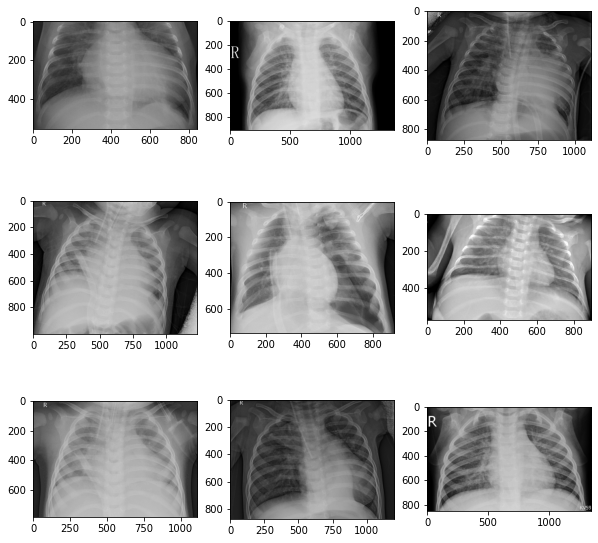

In [ ]:
pneumonia_img = os.listdir('/content/drive/MyDrive/Case_Study_2/pneumonia/train/PNEUMONIA')
dir = '/content/drive/MyDrive/Case_Study_2/pneumonia/train/PNEUMONIA'

plt.figure(figsize=(10, 10))

for m in range(9):
    plt.subplot(3, 3, m + 1)
    image = plt.imread(os.path.join(dir, pneumonia_img[m]))
    plt.imshow(image, cmap='gray')
  

<p> Let us now look at some chest X-ray images of the train data which do not contain Pneumonia or are Normal.<p>

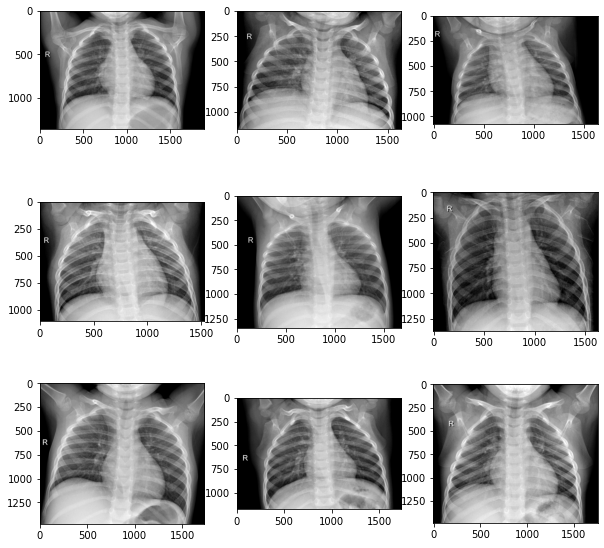

In [ ]:
normal_img = os.listdir('/content/drive/MyDrive/Case_Study_2/pneumonia/train/NORMAL')
dir = '/content/drive/MyDrive/Case_Study_2/pneumonia/train/NORMAL'

plt.figure(figsize=(10, 10))

for m in range(9):
    plt.subplot(3, 3, m + 1)
    image = plt.imread(os.path.join(dir, normal_img[m]))
    plt.imshow(image, cmap='gray')

<h2>3.3. High Level Statistics of an X-ray image</h2>

In [ ]:
normal_image = os.listdir('/content/drive/MyDrive/Case_Study_2/pneumonia/train/NORMAL')[0]
dir = '/content/drive/MyDrive/Case_Study_2/pneumonia/train/NORMAL'
img = plt.imread(os.path.join(dir, normal_image))

print('width_of_image',img.shape[0])
print('height_of_image',img.shape[1])
print('max_pixel_value',img.max())
print('min_pixel_value',img.min())

width_of_image 1353
height_of_image 1882
max_pixel_value 255
min_pixel_value 0


<h2>4. Normalize the pixel values in the chest X-ray images</h2>

<p> Each datapoint in train, test and validation data is an image and each image has a corresponding class label. 
We will begin by splitting the image features and the class labels. We will put the image features of train_data into X_train and we will put the class labels  of train_data in y_train. In a similar way we will create X_val, y_val and X_test and y_test.<p>

In [ ]:
X_train = []
y_train = []

for img_feat, class_label in train_data:
    X_train.append(img_feat)
    y_train.append(class_label)

print(len(X_train))
print(len(y_train))

5216
5216


<p> Note that we have only 5216 training datapoints.<p>

In [ ]:
X_test = []
y_test = []

for img_feat, class_label in test_data:
    X_test.append(img_feat)
    y_test.append(class_label)

print(len(X_test))
print(len(y_test))

624
624


In [ ]:
X_val = []
y_val = []

for img_feat, class_label in val_data:
    X_val.append(img_feat)
    y_val.append(class_label)

print(len(X_val))
print(len(y_val))

16
16


<p> The pixel values in each image are lying in the range [0,255], we will normalize these pixel values so that they lie in the range [0,1]. CNN model converges faster if the pixel values are in the range [0,1].<p>

In [ ]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [ ]:
X_train[0]

array([[0.14509804, 0.15294118, 0.15294118, ..., 0.15686275, 0.14901961,
        0.1372549 ],
       [0.14509804, 0.15294118, 0.15294118, ..., 0.15686275, 0.14509804,
        0.1372549 ],
       [0.14509804, 0.15294118, 0.15294118, ..., 0.15294118, 0.14509804,
        0.12941176],
       ...,
       [0.17254902, 0.2       , 0.21568627, ..., 0.22745098, 0.18823529,
        0.17647059],
       [0.16862745, 0.19215686, 0.22352941, ..., 0.22745098, 0.18823529,
        0.17647059],
       [0.16862745, 0.19607843, 0.21568627, ..., 0.22745098, 0.18039216,
        0.17254902]])

In [ ]:
X_train[0].shape

(150, 150)

<p> We will now resize the images in X_train, X_val, X_test.<p>

In [ ]:
X_train = X_train.reshape(-1, size_of_img, size_of_img, 1)
y_train = np.array(y_train)
print(X_train.shape)

(5216, 150, 150, 1)


In [ ]:
X_val = X_val.reshape(-1, size_of_img, size_of_img, 1)
y_val = np.array(y_val)

In [ ]:
X_test = X_test.reshape(-1, size_of_img, size_of_img, 1)
y_test = np.array(y_test)

<h2>5. Data Augmentation</h2>

<p> Whenever we are solving a medical image based problem, we often run into the problem of very small datasets. If we train our CNN model on small datasets, most likely it will overfit. So we create new images in the dataset (while keeping the original images) through a technique called as Data Augmentation. In data augmentation, we create new images from the original images by perfowming simple transforms like rotation, horizontal-shifting, vertical-shifting, zoom-in, zoom-out, adding noise etc. The main idea is to expand our dataset so that the CNN model does not overfit and at the same time make our CNN model rotation invariant, scale invariant, location invariant and noise invariant.<p>

In [ ]:
data_generator = ImageDataGenerator( rotation_range = 30,  # Randomly rotate the image by 30 degree
                              zoom_range = 0.2,  # Randomly zoom the image by 20%
                              width_shift_range=0.1,  # Randomly shift the image horizontally by 10% of the total width of the image
                              height_shift_range=0.1,  # Randomly shift the image vertically by 10% of the total height of the image
                              horizontal_flip = True,)  # randomly flip the image horizontally


data_generator.fit(X_train) # Train on the training dataset

<h1>6.Models</h1>

<p> The next step is to build a CNN model. We will proceed as follows:-

- <p> We will create five convolutional blocks which contain a convolutional layer, a maxpooling layer and a batch normalization layer.We will be using dropouts between the layers in the convolutional blocks to prevent our CNN model from overfitting.
-<p> On top of these layers, we will be using a flatten layer which is followed by dense layer and a dropout layer.
-<p> In all the convolutional layers, we will be using ReLu activation functions. In the last layer, we will be using a sigmoid activation function because we are trying to solve a binary classification problem.
-<p> We will be using RMSprop (Root Mean Square Propogation) as the optimizer and the loss that we are trying to minimize is binary cross entropy.


<p><b>Why are we performing Convolution ?</b><p>
<p> By performing Convolution, we are focussing only on the relevant features in the image and we are excluding all those features which are less important.<p>

<p><b>Why are we performing Max Pooling ?</b><p>
<p> Max Pooling can be thought of as downsampling. It reduces the dimensions of the input image. Max Pooling makes our CNN models location invariant, scale invariant and rotation invariant.<p>

<p><b>Why are we performing Flattening ?</b><p>
<p> We are performing flattening because we cannot feed the output of convolutional layer which are tensors directly into the dense layer. We need to perform flattening to convert the tensors into a single dimensional array.<p>

<p><b>Why are we using dropouts ?</b><p>
<p> We are using dropouts in between the layers of the convolutional neural network model to reduce overfitting in the model. Dropouts improve the generalization of models on the unseen data.<p>

<p><b>Why are we performing Batch Normalization ?</b><p>
<p> Batch Normalization is usually added in the deeper layers of the neural network. It guarantees that all the input batches come from the same distribution only. Using Batch Normalization allows us to have a larger learning rate. Batch Normalization works as a weak regularizer.When we use Batch Normalization, the model converges faster.<p>

<h2>6.1. CNN Model </h2>

In [ ]:
input_layer=tf.keras.layers.Input(shape=(150,150,1))

conv_layer_1 = tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',input_shape = (150,150,1))(input_layer)
batch_norm_1 = tf.keras.layers.BatchNormalization()(conv_layer_1)
max_pool_1   = tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same')(batch_norm_1)

conv_layer_2 = tf.keras.layers.Conv2D(64,(3,3),strides=(1,1), padding='same',activation='relu')(max_pool_1)
dropout_layer_1 = tf.keras.layers.Dropout(0.1)(conv_layer_2)
batch_norm_2 = tf.keras.layers.BatchNormalization()(dropout_layer_1)
max_pool_2   = tf.keras.layers.MaxPool2D((2,2),strides=(2,2), padding='same')(batch_norm_2)

conv_layer_3 = tf.keras.layers.Conv2D(64,(3,3),strides=(1,1), padding='same',activation='relu')(max_pool_2)
batch_norm_3 = tf.keras.layers.BatchNormalization()(conv_layer_3)
max_pool_3   = tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same')(batch_norm_3)

conv_layer_4 = tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu')(max_pool_3)
droput_layer_2 = tf.keras.layers.Dropout(0.2)(conv_layer_4)
batch_norm_4 = tf.keras.layers.BatchNormalization()(droput_layer_2)
max_pool_4 = tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same')(batch_norm_4 )

conv_layer_5 = tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu')(max_pool_4)
dropout_layer_3 = tf.keras.layers.Dropout(0.2)(conv_layer_5)
batch_norm_5 = tf.keras.layers.BatchNormalization()(dropout_layer_3)
max_pool_5 = tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same')(batch_norm_5)

flatten_1 = tf.keras.layers.Flatten()(max_pool_5)

dense_layer_1 = tf.keras.layers.Dense(128,activation='relu')(flatten_1)
dropout_layer_4 = tf.keras.layers.Dropout(0.2)(dense_layer_1)

output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(dropout_layer_4)

model = tf.keras.models.Model(inputs=input_layer,outputs=output_layer)


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0     

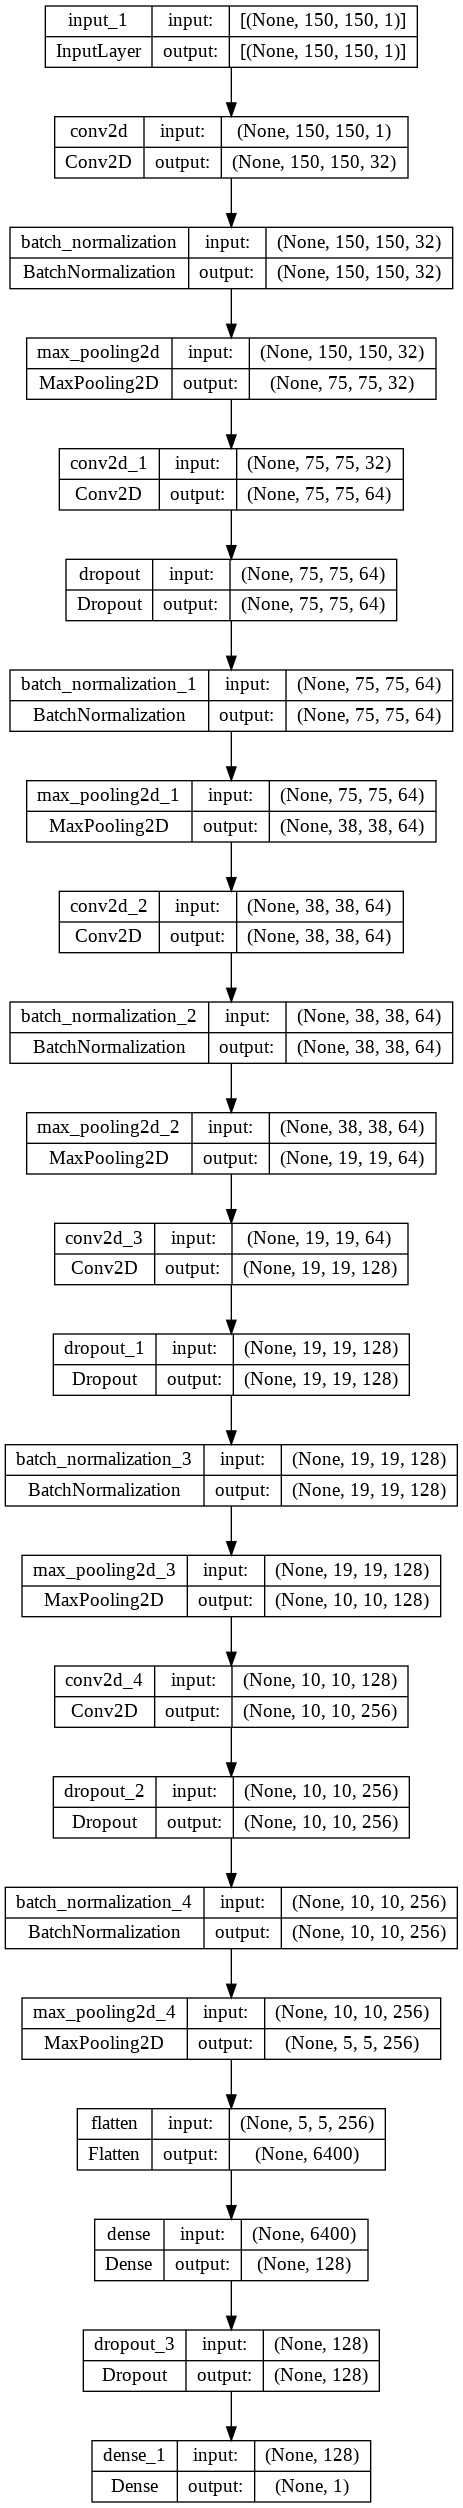

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

<h3> Model Compiling </h3>

In [ ]:
tb = TensorBoard(log_dir=LOG_DIR, histogram_freq=1, write_graph=True, write_images=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, verbose=1, mode='auto')
callbacks = [tb,lr]

model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

<h3> Model Training </h3>

<p> We will be training the model for 12 epochs with a batchsize of 32. If we use a larger batch size, we can get better results but doing so can get computationally expensive.<p>

In [ ]:
!rm -rf ./logs/*

hist = model.fit(data_generator.flow(X_train,y_train, batch_size = 32),epochs = 12, validation_data = data_generator.flow(X_val, y_val) ,callbacks = [callbacks])

Epoch 1/12
163/163 [==============================] - 364s 2s/step - loss: 0.6098 - accuracy: 0.8411 - val_loss: 39.1527 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 355s 2s/step - loss: 0.2723 - accuracy: 0.8932 - val_loss: 14.6503 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2329 - accuracy: 0.9172
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 350s 2s/step - loss: 0.2329 - accuracy: 0.9172 - val_loss: 77.9667 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 367s 2s/step - loss: 0.1769 - accuracy: 0.9465 - val_loss: 12.3856 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 378s 2s/step - loss: 0.1404 - accuracy: 0.9536 - val_loss: 1.4199 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 6/12
163/163 [===========================

<h3> Model Evaluation </h3>

<p> We will evaluate our model's performance on the test dataset. This step is extremely crucial in determining how well does our model perform on unseen datapoints. If our model performs well on unseen datapoints then we will say that the generalization of our model is good.<p>

In [ ]:
print("The Loss is: " , model.evaluate(X_test,y_test)[0])
print("The Accuracy is: " , model.evaluate(X_test,y_test)[1]*100,"%")

20/20 [==============================] - 8s 416ms/step - loss: 0.3302 - accuracy: 0.8974
The Loss is:  0.3301680386066437
20/20 [==============================] - 8s 412ms/step - loss: 0.3302 - accuracy: 0.8974
The Accuracy is:  89.74359035491943 %


<p> This model has been able to achieve an accuracy of 89.74% on unseen data. <p>

In [ ]:
#load_ext tensorboard
#%tensorboard --logdir '/content/logs'


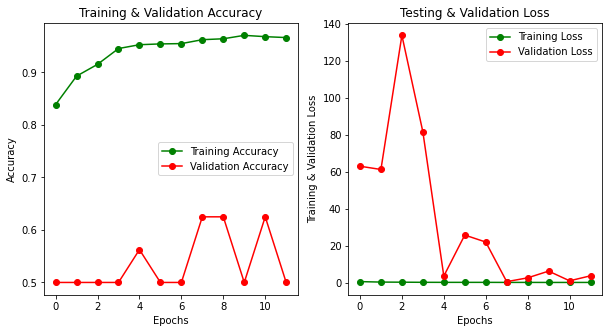

In [ ]:
ep = [j for j in range(12)]

fig , axs = plt.subplots(1,2)

training_accuracy = hist.history['accuracy']
training_loss = hist.history['loss']
validation_accuracy = hist.history['val_accuracy']
validation_loss = hist.history['val_loss']

fig.set_size_inches(10,5)

axs[0].plot(ep,training_accuracy ,'go-',label = 'Training Accuracy')
axs[0].plot(ep,validation_accuracy ,'ro-',label = 'Validation Accuracy')
axs[0].set_title('Training & Validation Accuracy')
axs[0].legend()
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")

axs[1].plot(ep,training_loss,'g-o',label = 'Training Loss')
axs[1].plot(ep,validation_loss, 'r-o',label = 'Validation Loss')
axs[1].set_title('Testing & Validation Loss')
axs[1].legend()
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Training & Validation Loss")

plt.show()

<h3> Observation </h3>
<p> From the plot  we can see that at the end of the 12th epoch, the train loss and the validation loss are not very different from each other. From this we conclude that our CNN model is not overfitting.<p>

<h1> 7.Conclusions </h1>




- <p> In this case study, we have built a convolutional neural network model from scratch which has achieved an accuracy of 89.74% on unseen datapoints. This is a decent accuracy given the fact that we have trained on such few datapoints.<p>
- <p> Using dropouts alongwith batch normalization has prevented the model from overfitting.<p>
- <p> By performing data augmentation, we have reduced the chances of overfitting our model.

<h1> 8.Future Work </h1>



- <p> Pneumonia detection from chest X-ray images can also be done by using transfer learning based models. These techniques can be used to obtain a higher accuracy.<p>

<h1> 9.References </h1>


*   https://www.who.int/news-room/fact-sheets/detail/pneumonia#:~:text=Pneumonia%20is%20a%20form%20of,painful%20and%20limits%20oxygen%20intake.
*   https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf

